Matplotlib was initially designed with only two-dimensional plotting in mind. Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. three-dimensional plots are enabled by importing the mplot3d toolkit, included with the main Matplotlib installation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

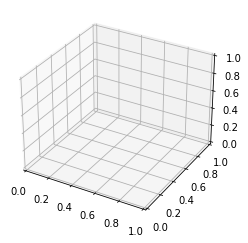

In [2]:
# 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

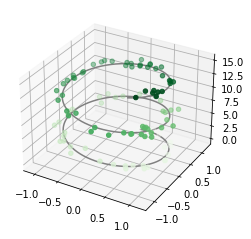

In [3]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

3D contour diagram of a three-dimensional sinusoidal function:

In [4]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

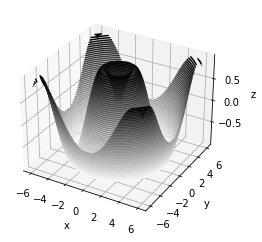

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

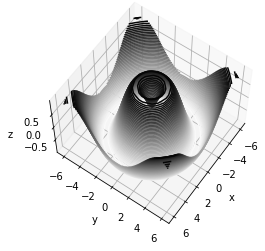

In [6]:
ax.view_init(60, 35)
fig

Wireframes and Surface Plots

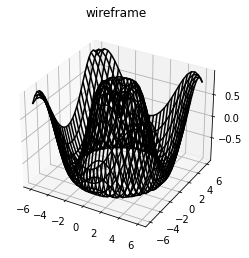

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

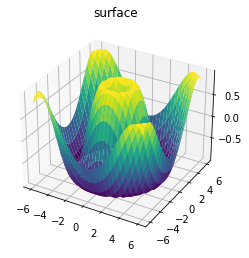

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear. Here is an example of creating a partial polar grid, which when used with the surface3D plot can give us a slice into the function we're visualizing:

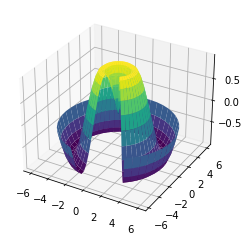

In [9]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

Surface Triangulations

For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient. In these situations, the triangulation-based plots can be very useful. What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [10]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

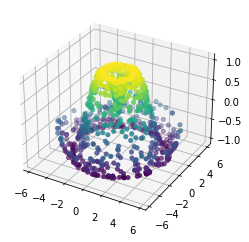

In [11]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

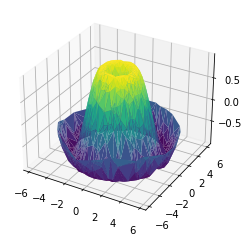

In [12]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

Visualizing a Möbius strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist. Topologically, it's quite interesting because despite appearances it has only a single side! Here we will visualize such an object using Matplotlib's three-dimensional tools. The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them  𝜃 , which ranges from  0  to  2𝜋  around the loop, and  𝑤  which ranges from -1 to 1 across the width of the strip:

In [13]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the (x, y, z) positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called  𝜃 ), while the other is the twisting of the strip about its axis (we'll call this  𝜙 ). For a Möbius strip, we must have the strip makes half a twist during a full loop, or  Δ𝜙=Δ𝜃/2 .

In [14]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding. We'll define  𝑟 , the distance of each point from the center, and use this to find the embedded  (𝑥,𝑦,𝑧)  coordinates:

In [15]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation within the underlying parametrization, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip. This can be accomplished as follows:

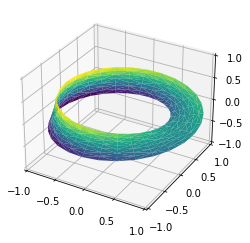

In [16]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);